### 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

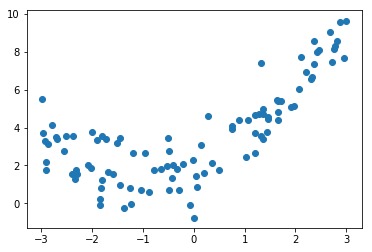

In [3]:
plt.scatter(X,y)
plt.show()

### 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.4953707811865009

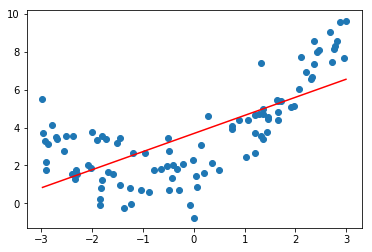

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_absolute_error

y_predict = lin_reg.predict(X)
mean_absolute_error(y,y_predict)

1.4313766412243376

### 使用多项式回归 

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [8]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [9]:
y2_predict = poly2_reg.predict(X)  # 计算预测值
mean_absolute_error(y,y2_predict)  # 计算预测的均方误差

0.8414428476642347

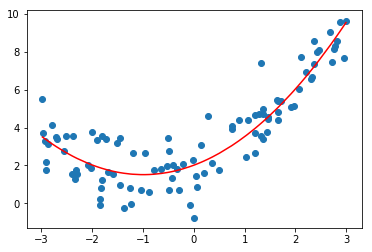

In [10]:
# 可视化显示出来
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color='r')
plt.show()

In [11]:
# 测试degree值为10的情况
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y)

# 均方误差的值要小于degree=2的情况
y10_predict = poly10_reg.predict(X)  # 计算预测值
mean_absolute_error(y,y10_predict)  # 计算预测的均方误差

0.8217454970891045

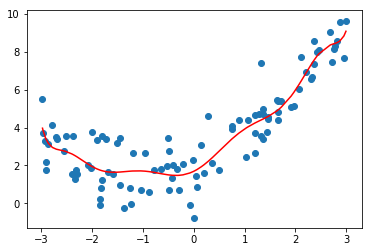

In [12]:
# 可视化显示出来
plt.scatter(x,y)
plt.plot(np.sort(x),y10_predict[np.argsort(x)],color='r')
plt.show()

In [13]:
# 测试degree值为100的情况
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)

# 均方误差的值要更小于degree=10的情况
y100_predict = poly100_reg.predict(X)  # 计算预测值
mean_absolute_error(y,y100_predict)  # 计算预测的均方误差

0.62482975198207

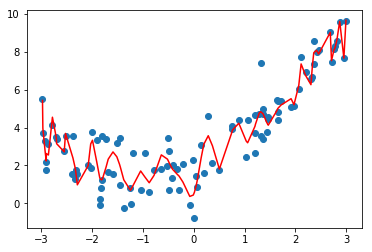

In [14]:
# 可视化显示出来
plt.scatter(x,y)
plt.plot(np.sort(x),y100_predict[np.argsort(x)],color='r')
plt.show()

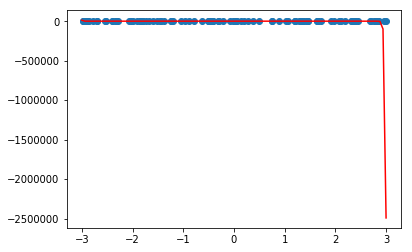

In [15]:
X_plot = np.linspace(-3,3,100).reshape(100,1) # 均匀取值，并reshape成一列
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.show()

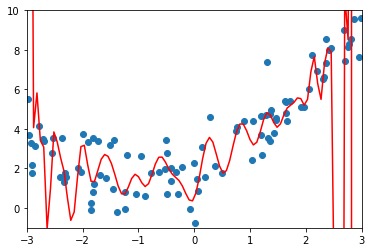

In [16]:
# 限定轴
plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

### train test split的意义

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_absolute_error(y_test,y_predict)

1.172170971224097

In [19]:
# 测试degree值为10的情况
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train,y_train)

# 均方误差的值要小于degree=2的情况
y2_predict = poly2_reg.predict(X_test)  # 计算预测值
mean_absolute_error(y_test,y2_predict)  # 计算预测的均方误差

0.7748121730568971

In [20]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train,y_train)

# 均方误差的值要大于degree=2的情况
y10_predict = poly10_reg.predict(X_test)  # 计算预测值
mean_absolute_error(y_test,y10_predict)  # 计算预测的均方误差

0.8650972089949965

In [21]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train,y_train)

# 均方误差的值要大于degree=10的情况
y100_predict = poly100_reg.predict(X_test)  # 计算预测值
mean_absolute_error(y_test,y100_predict)  # 计算预测的均方误差

42275.04574756917

![数据集的意义](https://upload-images.jianshu.io/upload_images/9140378-00464413283a67b3.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 交叉验证

In [22]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

### 测试train_test_split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=666)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

best_score,best_p,best_k = 0,0,0
for k in range(2,11):
    for p in range(1,5):
        knn_clf = KNeighborsClassifier(weights="distance",n_neighbors=k,p=p)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_score ,best_p,best_k = score,p,k

print("Best K = ",best_k)
print("Best P = ",best_p)
print("Best Score = ",best_score)

Best K =  3
Best P =  4
Best Score =  0.9860917941585535


### 学习曲线

In [25]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

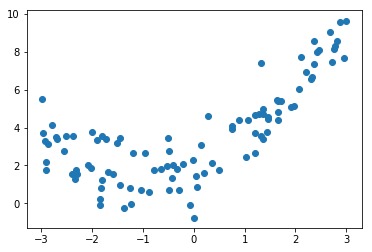

In [26]:
plt.scatter(x,y)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [28]:
X_train.shape

(75, 1)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test,y_test_predict))

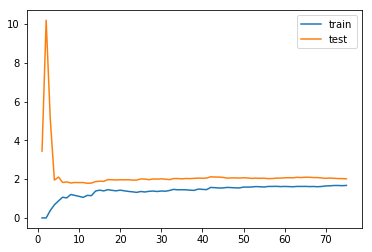

In [30]:
plt.plot([i for i in range(1,76)],np.sqrt(train_score),label="train")
plt.plot([i for i in range(1,76)],np.sqrt(test_score),label="test")
plt.legend()  # 显示label标签
plt.show()

In [31]:
def plot_leaning_curve(algo,X_train,X_test,y_train,y_test):    
    train_score = []
    test_score = []
    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
    plt.plot([i for i in range(1,len(X_train)+1)],
             np.sqrt(train_score),label="train")
    plt.plot([i for i in range(1,len(X_train)+1)],
             np.sqrt(test_score),label="test")
    plt.legend()  # 显示label标签
    plt.axis([0,len(X_train)+1,0,4])
    plt.show()

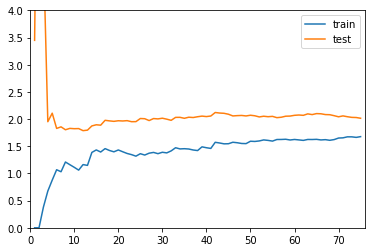

In [32]:
plot_leaning_curve(lin_reg,X_train,X_test,y_train,y_test)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

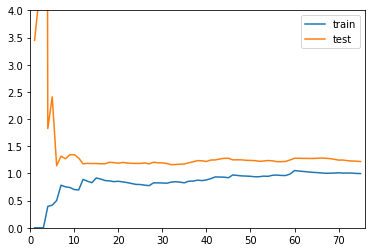

In [34]:
pol2_reg = PolynomialRegression(degree=2)
plot_leaning_curve(pol2_reg,X_train,X_test,y_train,y_test)

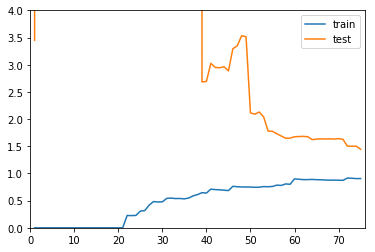

In [35]:
pol20_reg = PolynomialRegression(degree=20)
plot_leaning_curve(pol20_reg,X_train,X_test,y_train,y_test) # 出现过拟合的情况